# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 1) Cargamos los datos

In [1]:
import numpy as np
import pandas as pd
import funpymodeling
import matplotlib.pyplot as plt

In [2]:
# Para visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
df_data = pd.read_csv('../data/customer_dataset.csv', sep=',')

In [4]:
print(df_data.shape)
print(df_data.columns)
display(df_data.head(5))

(653, 13)
Index(['fraudulent', 'transactionAmount', 'transactionFailed', 'orderAmount',
       'orderState', 'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'emailDomain',
       'emailProvider', 'customerIPAddressSimplified', 'sameCity'],
      dtype='object')


,fraudulent,transactionAmount,transactionFailed,orderAmount,orderState,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,emailDomain,emailProvider,customerIPAddressSimplified,sameCity
0,False,18.0,False,18.0,pending,True,card,JCB 16 digit,Citizens First Banks,com,yahoo,only_letters,yes
1,False,26.0,False,26.0,fulfilled,True,card,JCB 16 digit,Citizens First Banks,com,yahoo,only_letters,yes
2,True,45.0,False,45.0,fulfilled,False,bitcoin,American Express,Bastion Banks,com,yahoo,only_letters,no
3,True,23.0,False,23.0,fulfilled,False,bitcoin,American Express,Bastion Banks,com,yahoo,only_letters,yes
4,True,43.0,True,43.0,fulfilled,True,bitcoin,VISA 16 digit,Solace Banks,com,yahoo,only_letters,no


In [5]:
display(df_data.dtypes)

fraudulent                             bool
transactionAmount                   float64
transactionFailed                    object
orderAmount                         float64
orderState                           object
paymentMethodRegistrationFailure     object
paymentMethodType                    object
paymentMethodProvider                object
paymentMethodIssuer                  object
emailDomain                          object
emailProvider                        object
customerIPAddressSimplified          object
sameCity                             object
dtype: object

In [6]:
funpymodeling.status(df_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,fraudulent,0,0.000000,386,0.591118,2,bool
1,transactionAmount,30,0.045942,0,0.000000,67,float64
2,transactionFailed,30,0.045942,455,0.696784,2,object
3,orderAmount,30,0.045942,0,0.000000,67,float64
4,orderState,30,0.045942,0,0.000000,3,object
5,paymentMethodRegistrationFailure,12,0.018377,559,0.856049,2,object
6,paymentMethodType,12,0.018377,0,0.000000,4,object
7,paymentMethodProvider,12,0.018377,0,0.000000,10,object
8,paymentMethodIssuer,12,0.018377,0,0.000000,20,object
9,emailDomain,0,0.000000,0,0.000000,6,object


In [7]:
df_data['fraudulent'].value_counts(dropna=False, normalize=False), df_data['fraudulent'].value_counts(dropna=False, normalize=True) * 100

(False    386
 True     267
 Name: fraudulent, dtype: int64,
 False    59.111792
 True     40.888208
 Name: fraudulent, dtype: float64)

In [8]:
funpymodeling.status(df_data[df_data['fraudulent'] == True])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,fraudulent,0,0.000000,0,0.000000,1,bool
1,transactionAmount,10,0.037453,0,0.000000,67,float64
2,transactionFailed,10,0.037453,197,0.737828,2,object
3,orderAmount,10,0.037453,0,0.000000,67,float64
4,orderState,10,0.037453,0,0.000000,3,object
5,paymentMethodRegistrationFailure,1,0.003745,229,0.857678,2,object
6,paymentMethodType,1,0.003745,0,0.000000,4,object
7,paymentMethodProvider,1,0.003745,0,0.000000,10,object
8,paymentMethodIssuer,1,0.003745,0,0.000000,20,object
9,emailDomain,0,0.000000,0,0.000000,6,object


In [9]:
funpymodeling.status(df_data[df_data['fraudulent'] == False])

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,fraudulent,0,0.000000,386,1.000000,1,bool
1,transactionAmount,20,0.051813,0,0.000000,41,float64
2,transactionFailed,20,0.051813,258,0.668394,2,object
3,orderAmount,20,0.051813,0,0.000000,41,float64
4,orderState,20,0.051813,0,0.000000,3,object
5,paymentMethodRegistrationFailure,11,0.028497,330,0.854922,2,object
6,paymentMethodType,11,0.028497,0,0.000000,4,object
7,paymentMethodProvider,11,0.028497,0,0.000000,10,object
8,paymentMethodIssuer,11,0.028497,0,0.000000,10,object
9,emailDomain,0,0.000000,0,0.000000,5,object


Dropeamos las columnas con NaN ya que el impacto sobre la variable `fraudulent` es minimo.

In [10]:
print(df_data.shape)
df_data.dropna(inplace=True)
print(df_data.shape)

(653, 13)
(623, 13)


In [11]:
df_data['fraudulent'].value_counts(dropna=False, normalize=False), df_data['fraudulent'].value_counts(dropna=False, normalize=True) * 100

(False    366
 True     257
 Name: fraudulent, dtype: int64,
 False    58.747994
 True     41.252006
 Name: fraudulent, dtype: float64)

In [12]:
funpymodeling.status(df_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,fraudulent,0,0.0,366,0.587480,2,bool
1,transactionAmount,0,0.0,0,0.000000,67,float64
2,transactionFailed,0,0.0,455,0.730337,2,object
3,orderAmount,0,0.0,0,0.000000,67,float64
4,orderState,0,0.0,0,0.000000,3,object
5,paymentMethodRegistrationFailure,0,0.0,541,0.868379,2,object
6,paymentMethodType,0,0.0,0,0.000000,4,object
7,paymentMethodProvider,0,0.0,0,0.000000,10,object
8,paymentMethodIssuer,0,0.0,0,0.000000,19,object
9,emailDomain,0,0.0,0,0.000000,6,object


In [ ]:
df_data

In [ ]:
df_data['transactionFailed'].value_counts(dropna=False, normalize=False), df_data['transactionFailed'].value_counts(dropna=False, normalize=True) * 100

In [ ]:
df_data['paymentMethodRegistrationFailure'].value_counts(dropna=False, normalize=False), df_data['paymentMethodRegistrationFailure'].value_counts(dropna=False, normalize=True) * 100

#### Convertimos los tipos de datos de las columnas

In [17]:
df_data['fraudulent'] = df_data['fraudulent'].astype(str)
df_data['transactionFailed'] = df_data['transactionFailed'].astype(str)
df_data['paymentMethodRegistrationFailure'] = df_data['paymentMethodRegistrationFailure'].astype(str)

In [18]:
df_data['transactionAmount'] = df_data['transactionAmount'].astype(float)
df_data['orderAmount'] = df_data['orderAmount'].astype(float)

In [ ]:
df_data.dtypes

# AED 1

## 1) Variables categóricas

Vamos a analizar la variable categorica `paymentMethodType`

In [13]:
funpymodeling.freq_tbl(df_data['paymentMethodType'])

,paymentMethodType,frequency,percentage,cumulative_perc
0,card,479,0.768860,0.768860
1,apple pay,49,0.078652,0.847512
2,paypal,48,0.077047,0.924559
3,bitcoin,47,0.075441,1.000000


In [14]:
t_pay_met_type = funpymodeling.freq_tbl(df_data['paymentMethodType'])

In [15]:
t_pay_met_type.query("frequency<=30")['paymentMethodType']

Series([], Name: paymentMethodType, dtype: object)

Vemos que no hay algun tipo de metodo de pago dentro del dataset que se use 30 veces o menos.

El metodo de pago mas usado es por tarjeta (`card`), usado practicamente casi un 77% de las veces.

# AED 2

## 1) Análisis de variables categóricas

Vamos a analizar la columna `fraudulent`

In [19]:
funpymodeling.freq_tbl(df_data['fraudulent'])

,fraudulent,frequency,percentage,cumulative_perc
0,False,366,0.58748,0.58748
1,True,257,0.41252,1.00000


Contamos un dataset bastante balanceado, donde:
* Es fraudulento: 41,25%
* No es fraudulento: 58,75%

## 2) Análisis bivariado

### 2.A) Análisis de categórica vs. categórica

Vamos a analizar las columnas `fraudulent` y `transactionFailed`

In [20]:
pd.crosstab(df_data['fraudulent'], df_data['transactionFailed'])

transactionFailed,False,True
fraudulent,,
False,258,108
True,197,60


Podemos apreciar que en la mayoria de las veces cuando no hay fraude, la transaccion no falla.

### 2.B) Análisis de numérica vs. categórica

¿Cambia el valor el monto de la transaccion `transactionAmount` en función de si fue fraudulenta o no `fraudulent`?

In [21]:
df_data.groupby('fraudulent')['transactionAmount'].mean()

fraudulent
False    29.049180
True     42.501946
Name: transactionAmount, dtype: float64

Vemos que cuando una transacciom es fraudulenta, el monto de la misma es en promedio un 44% mas grande.

### 2.C) Análisis de numérica vs numérica

Vamos a analizar las columnas `orderAmount` y `transactionAmount`

In [22]:
df_data.groupby('orderAmount')['transactionAmount'].mean()

orderAmount
10.0      10.0
11.0      11.0
12.0      12.0
13.0      13.0
14.0      14.0
         ...  
72.0      72.0
73.0      73.0
74.0      74.0
75.0      75.0
353.0    353.0
Name: transactionAmount, Length: 67, dtype: float64

In [24]:
print(df_data.shape)
print(df_data[df_data.transactionAmount == df_data.orderAmount].shape)
print(df_data.transactionAmount == df_data.orderAmount)

(623, 13)
(623, 13)
0      True
1      True
2      True
3      True
4      True
       ... 
648    True
649    True
650    True
651    True
652    True
Length: 623, dtype: bool


Podemos ver que las columnas `orderAmount` y `transactionAmount` contienen los mismos valores.

## 3) Gráficos en AED

### 3.A) Análisis de numérica vs. categórica

Vamos a analizar las columnas `transactionAmount` y `transactionFailed`

<Axes: xlabel='transactionAmount', ylabel='transactionFailed'>

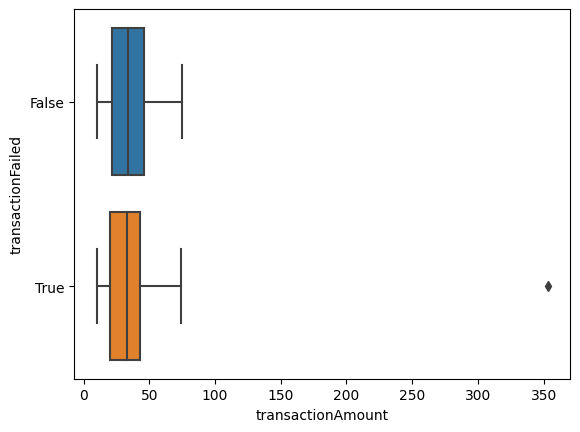

In [25]:
import seaborn as sns

#sns.boxplot(y='transactionAmount', x='transactionFailed', data=df_data)
sns.boxplot(y='transactionFailed', x='transactionAmount', data=df_data)

En el grafico podemos apreciar que la distribucion del monto de la transaccion es similar, independientemente si la transaccion falla o no.

Pero podemos ver un outlier cuando la transaccion falla, con un valor cercano al 350.

### 3.B) Análisis de categórica vs. categórica

Vamos a analizar las columnas `paymentMethodType` y `orderState`

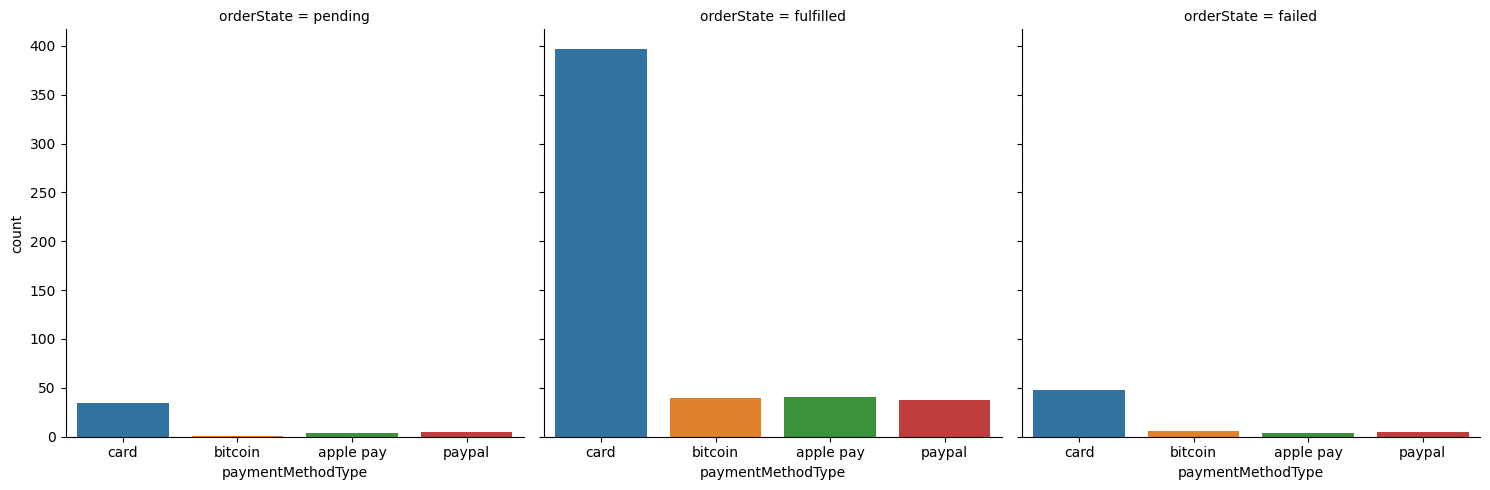

In [26]:
g = sns.catplot(
    x="paymentMethodType",
    col="orderState",
    data=df_data,
    kind="count"
)

Podemos apreciar en el grafico que se cumple la misma "distribucion" de metodos de pago, independientemente del estado de la orden.

Pero que cuando le orden se cumple, el metodo de pago mediante tarjeta es el que mas sobresalta.

### 3.C) Análisis de numérica vs. numérica

In [27]:
df_data_aux = df_data[["orderAmount", "transactionAmount"]].copy()

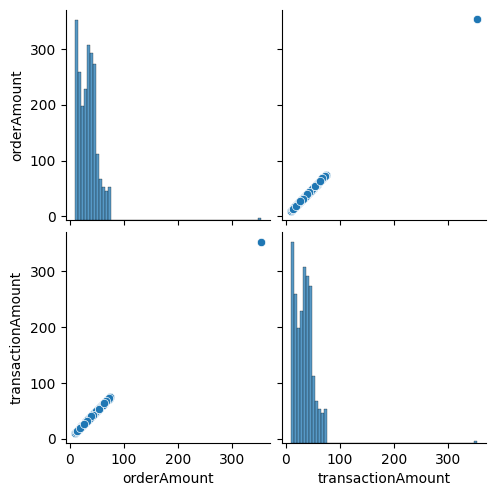

In [28]:
sns.pairplot(df_data_aux)

Como nombramos anteriormente, las columnas `orderAmount` y `transactionAmount` contienen los mismo valores.

# Correlacion

Como tenemos pocas columnas/filas no es necesario que tomemos una muestra del dataset.

In [29]:
d_cor = df_data.corr()

/var/folders/v_/ck4v2fj55cgbdrbv23231mqdd9k8lc/T/ipykernel_88252/1838229267.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d_cor = df_data.corr()


In [30]:
d_cor

,transactionAmount,orderAmount
transactionAmount,1.0,1.0
orderAmount,1.0,1.0


<Axes: >

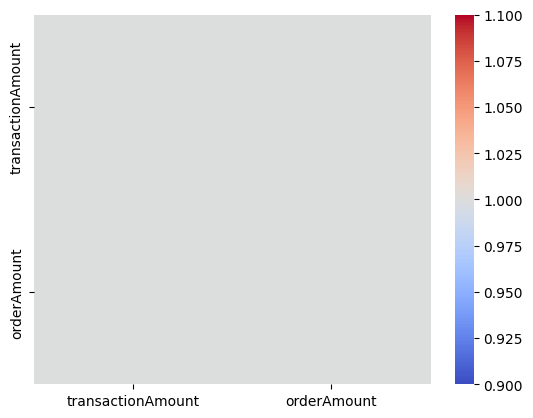

In [31]:
# plt.figure(figsize=(5, 5))
sns.heatmap(d_cor, cmap='coolwarm')

In [39]:
from pandas_profiling import ProfileReport

In [40]:
ProfileReport(df_data)

Render HTML: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.62it/s]


Observando el grafico de correlacion, podemos observar lo siguiente:
* Las columnas `orderAmount` y `transactionAmount` estan estrechamente relacionadas. Esto es porque estas tiene los mismos valores.
* El emisor del metodo de pago `paymentMethodIssuer` tiene relacion con si la transaccion fue fraudulenta o no. Puede ser que haya emisores sufran mas fraudes.
* Tambien hay una relacion entre el provedor del email `emailProvider` y si la transaccion fue fraudulenta o no.
* El dominio del email y el provider del mismo tambien estan muy relacionados.
* Hay relacion entre la cantidad de la orden/transaccion y si la misma fue fraudulenta.

## 2) Análisis de correlaciones no lineales basadas en teoría de la información

In [32]:
from minepy import MINE

In [33]:
df_data['transactionFailed'] = df_data['transactionFailed'].apply(lambda x: 1 if x == 'True' else 0)

In [34]:
# 1ro hago la especificación
mine = MINE(alpha=0.6, c=15, est="mic_approx")
# mine = MINE()

# 2do calculo de los estadísticos
mine.compute_score(df_data['transactionAmount'], df_data['transactionFailed'])

# 3ro acceso a los resultados (estadísticos)
mine.mic()

0.061135409260562004

Como nos da un valor muy cercano a 0, esto nos indica que no hay relacion entre `transactionAmount` y `transactionFailed`.